In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
def heatmap(data):
    #POINT DATASET
    x = []
    y = []
    for key, value in data.items():
        if key == 'top_left':
            for i in range(value):
                y.append(50)
                x.append(15)
        elif key == 'mid_left':
            for i in range(value):
                y.append(30)
                x.append(15)
        elif key == 'down_left':
            for i in range(value):
                y.append(15)
                x.append(15)
        elif key == 'top_center':
            for i in range(value):
                y.append(50)
                x.append(30)
        elif key == 'mid_center':
            for i in range(value):
                y.append(30)
                x.append(30)
        elif key == 'down_center':
            for i in range(value):
                y.append(15)
                x.append(30)        
        elif key == 'top_right':
            for i in range(value):
                y.append(50)
                x.append(45)
        elif key == 'mid_right':
            for i in range(value):
                y.append(30)
                x.append(45)
        elif key == 'down_right':
            for i in range(value):
                y.append(15)
                x.append(45)
    
    #DEFINE GRID SIZE AND RADIUS(h)
    grid_size=1
    h=10

    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    #FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    plt.pcolormesh(x_mesh,y_mesh,intensity)
    plt.plot(x,y,'ro')
    plt.colorbar()
    plt.show()


    return data

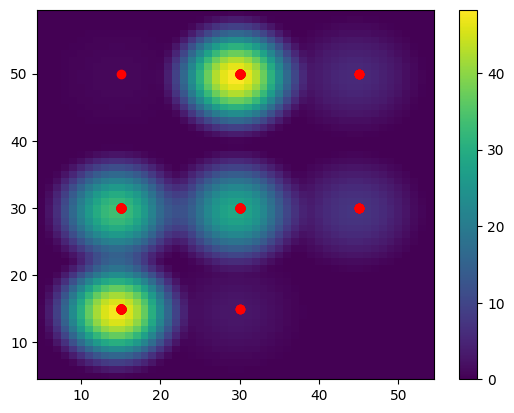

In [6]:
if __name__ == '__main__':
    data = {'top_left': 1, 'mid_left': 36, 'down_left': 51, 'top_center': 52, 'mid_center': 31, 'down_center': 3, 'top_right': 6, 'mid_right': 8, 'down_right': 0}
    heatmap(data)